In [5]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

# Neural Networks
## Introduction

In this tutorial, I will build a classifier based on neural networks without using python package for neural network -- PyBrain.

An artificial neural network is an interconnected group of nodes, akin to the vast network of neurons in a brain. Each circular node represents an artificial neuron and an arrow represents a connection from the output of one neuron to the input of another. 

The goal of the neural networks is to solve problems in the same way that the human brain would. Modern artificial neural network tipically works with thousand to a few million neural units and millions of connections.

The neural networks has been used a lot in computer vision and speech recognition at present.

## Build model for neural networks


In this tutorial, we are going to build a three layer neural networks, which is the simplest structure for neural networks. But it can be simply extends to N-layer Neural Networks basically by adding more hidden layers in this model.

In the three layer neural network, here we have just one hidden layer with one input layer and one output layer.

The number of nodes in the input layer is determined by the dimension of our input data, for example, if we use two dimensional input like 2-D points, we will have two nodes in the input layer. 

The number of nodes in the output layer is determined by the number of classes we want to classify the data. For example, if we want to classify our data into two classes, we will have two nodes in the output layer.

The situation to choose the middle hidden layer is more complex. Although we can casually choose the number of nodes for our hidden layer, there are some trade offs here. First, if we have a small number of nodes in our hiddle layer, we may not accurately fit our model. But if we choose a large number of nodes in our hiddle layer, we may have more calculations when doing prediction and alsohave possibility of overfitting. There is not a formular for us the determine the nuber of nodes in hiddle layer which has the best performance, there is a rule of thumb proposed by Jeff Heaton, author of Introduction to Neural Networks in Java, saying that 'the optimal size of the hidden layer is usually between the size of the input and size of the output layers'.

Then we should choose our activation functions. Although there are lots of different activations functions, we will choose the most popular one, sigmoid function.

## Make prediction using neural network model

We use forward propagation for our model. For our model, we have two nodes in input layer and two nodes in output layer, thus we can write the function as follows.

$$z_{1} = x*W_{1} + b_{1}$$
$$a_{1} = tanh(z_{1})$$
$$z_{2} = a_{1}*W_{2} + b_{2}$$
$$a_{2} = \hat{y} = softmax(z_{2})$$

We notate input layer to be layer 0 and the output to be layer n, which is 2 in our model. $z_{i}$ is the input of layer i and output of layer i-1, and $a_{i}$ is the output of layer i.

$W_{1}$,$b_{1}$,$W_{2}$,$b_{2}$ are parameter for the networks. The sizes of these parameters are determined by the number of node for input, and number of nodes for output, the number of node for each hidden middle layer.

## Learn the parameter

To determine the parameters, we should minimize the error in our training data. To define the error, we use loss function. As for softmax fundtion, a popular choice is cross-entropy loss function. If we have N training examples and C classes then the loss for our prediction \hat{y} with respect to the true labels y is given by the following formula:

$$L(y,\hat{y}) = -\frac{1}{N}*\sum_{n\in N}\sum_{i\in C}y_{n,i}log\hat{y}_{n,i}$$

To find the mininum, we use gradient descent to find the minimum. We implement batch gradient descent with a fixed learning rate in this project.

Batch gradient descent, computes the gradient of the cost function for the entire training dataset using the following formula :

$$\theta = \theta - \eta * \bigtriangledown_{\theta}J(\theta)$$

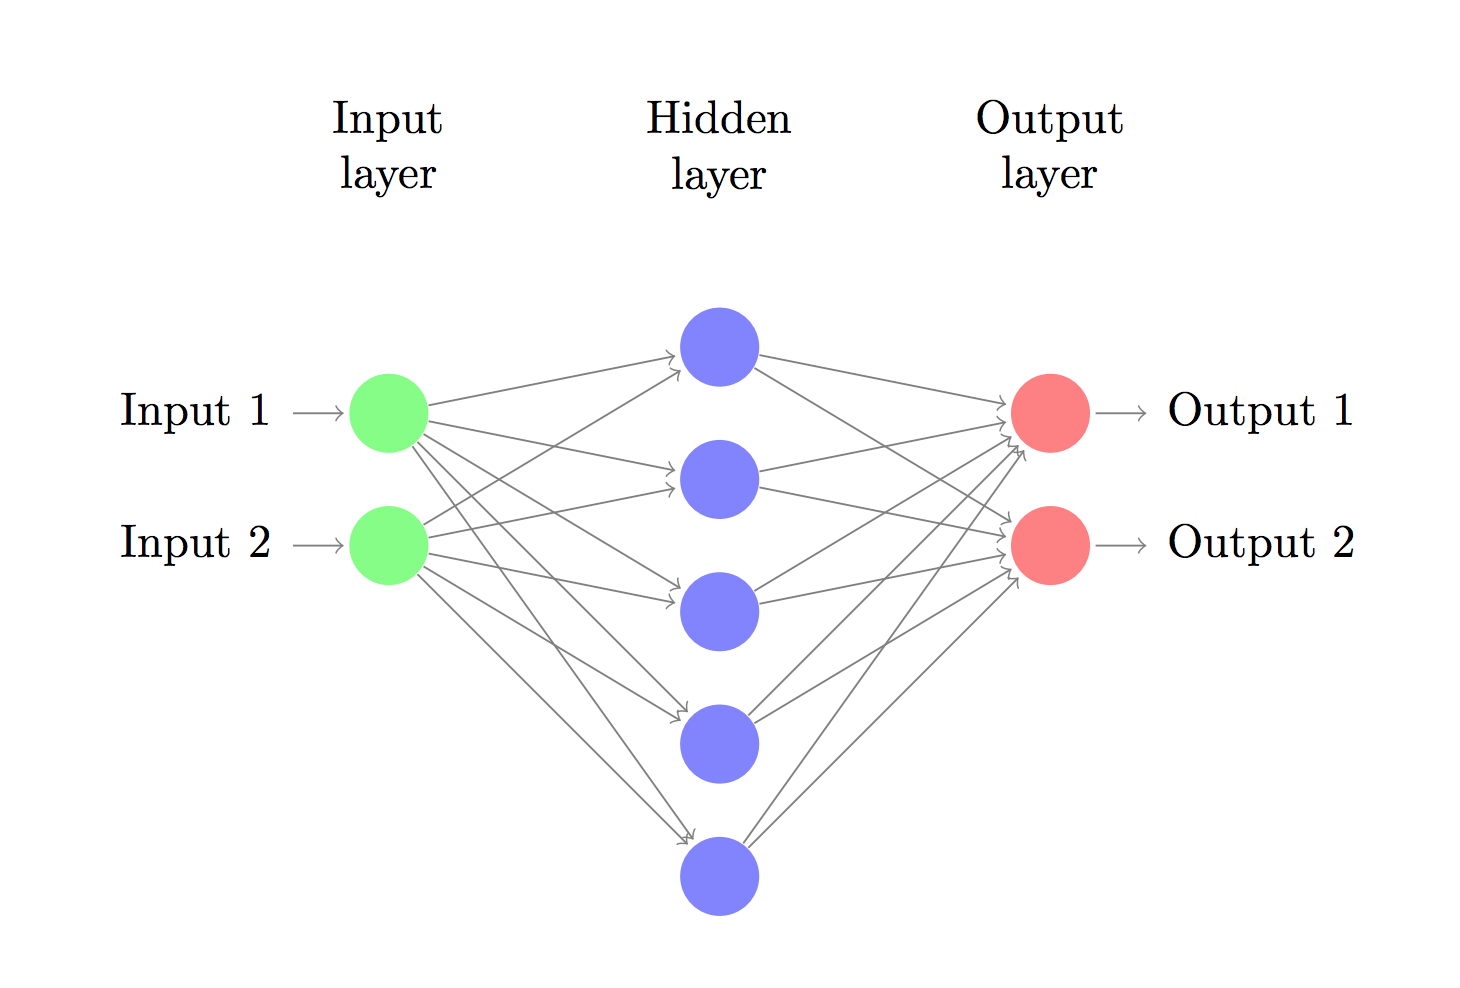

In [6]:
from IPython.display import Image
Image("neural_network.png")

# Implementation

In [7]:
# Generate a dataset and plot it
def create_dataset():
    (X, y) = datasets.make_moons(n_samples=400, noise=0.20)
    return (X, y)

400


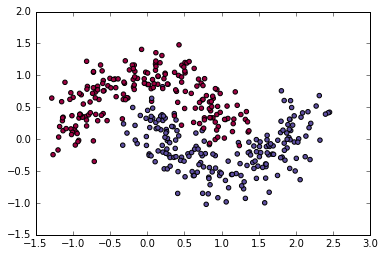

In [8]:
# TEST_START
(X, y) = create_dataset()
print len(X)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
# TEST_STOP

## Step1 : Define variables and parameters

In [9]:
class Config:
    #the number of node in the input layer
    INPUT_DIMENSION = 2

    #the number of node in the output layer
    OUTPUT_DIMENSION = 2

    #learning rate in gradient descent, which is also the step size when doing gradient descent
    EPSILON = 0.01

    #regulation parameter when calculating the loss function
    LAMBDA = 0.01

## Step2 : Implement the loss function

In this part, we calculate the loss according to our sample and true label under the constain of the present model parameter. The function we use is as follows:

$$L(y,\hat{y}) = -\frac{1}{N}\sum_{n=1}^{N}\sum_{i=1}^{I}y_{n,i}log(\hat{y}_{n,i})$$

In [10]:
# loss fundction for sample
def loss_function(model, X, y):
    # num_examples = len(X)  # training set size
    W1 = model['W1']
    W2 = model['W2']
    b1 = model['b1']
    b2 = model['b2']

    # calculate the softmax value for the output and find the max value which indicates the class for each sample
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_val = np.exp(z2)
    softmax_val = exp_val / np.sum(exp_val, axis=1, keepdims=True)

    # calculate the cross entropy loss for the
    log_likelihood = -np.log(softmax_val[range(len(X)), y])
    data_loss = np.sum(log_likelihood)

    data_loss += Config.LAMBDA / 2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1. / len(X) * data_loss

## Step3 : Implement the prediction function for output

In this part, we implement method for doing the prediction based on our output. With the known parameter of neural network, we can calculate the softmax value, which is the output for our sample X. The output is an N * 2 matrix (N is the number of sample input and 2 is the number of output nodes). We assume that the max value indicate the prediction  calss of X and return it.

In [11]:
# predict for samples, which the output is 0 or 1 in our case with two nodes for output layer
def predict(model, x):
    W1 = model['W1']
    W2 = model['W2']
    b1 = model['b1']
    b2 = model['b2']

    # calculate the softmax value for the output and find the max value which indicates the class for each sample
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_val = np.exp(z2)
    softmax_val = exp_val / np.sum(exp_val, axis=1, keepdims=True)

    # return the prediction for each sample
    return np.argmax(softmax_val, axis=1)

In [31]:
# TEST_START
mu = 0
sigma = 0.20
test_x = np.random.normal(mu,sigma,2)

print test_x

predict_label = predict(model,test_x)

print predict_label
# TEST_STOP

[-0.41073408  0.13656888]
[1]


## Step4 : Implement the training function for building neural network model

In this part, we define method to build our model for the neural networks. There are several steps.

First, we initialize the parameter in our model. For W1 and W2, we have to determine that they are not zero matrix, otherwise, the model will be wrong because the coresponding nodes will be inactive when W is zero. And the W value will then be tuned in the process of gradient descent. For b1 and b2, the value can be anything, because the value will be adapted in the iteration process of gradient descent.

Second, we are doing the gradient descent to minimize the loss fundtion and optimize the parameter of our neural networks. The equations are as follows :

1/Forward Propagation
$$z_{1} = x*W_{1} + b_{1}$$
$$a_{1} = tanh(z_{1})$$
$$z_{2} = a_{1}*W_{2} + b_{2}$$
$$a_{2} = \hat{y} = softmax(z_{2})$$

2/Backend Propagation
$$\delta _{3} = \hat{y} - y$$
$$\delta _{2} = (1-tanh^{2}z_{1})\cdot \delta _{3}W_{2}^{T}$$
$$\frac{\partial L}{\partial W_{2}} = a_{1}^{T}\delta _{3}$$
$$\frac{\partial L}{\partial b_{2}} = \delta _{3}$$
$$\frac{\partial L}{\partial W_{1}} = x^{T}\delta _{2}$$
$$\frac{\partial L}{\partial b_{1}} = \delta _{2}$$

Then, though a number of iterations, we will have our model parameter

In [12]:
def build_model(X, y, nn_hdim, num_passes=20000, print_loss=False):
        # Initialize the parameters to random values. We need to learn these.
    num_examples = len(X)
    # np.random.seed(0)

    # initial W1 randomly, using while to make sure that W1 is not zero matrix
    W1 = np.random.randn(Config.INPUT_DIMENSION, nn_hdim) / np.sqrt(Config.INPUT_DIMENSION)
    while not np.any(W1):
        W1 = np.random.randn(Config.INPUT_DIMENSION, nn_hdim) / np.sqrt(Config.INPUT_DIMENSION)

    # initial b1 to be random value ,b1 can be zero of course
    b1 = np.random.randn(1, nn_hdim)

    # initial W1 randomly, using while to make sure that W1 is not zero matrix
    W2 = np.random.randn(nn_hdim, Config.OUTPUT_DIMENSION) / np.sqrt(nn_hdim)
    while not np.any(W2):
        W2 = np.random.randn(Config.INPUT_DIMENSION, nn_hdim) / np.sqrt(Config.INPUT_DIMENSION)

    # initial b2 to be random value, b2 can be zero of course
    b2 = np.random.randn(1, Config.OUTPUT_DIMENSION)

    # This is what we return at the end
    model = {}

    # Gradient descent. For each batch...
    for i in range(0, num_passes):
        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Back propagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += Config.LAMBDA * W2
        dW1 += Config.LAMBDA * W1

        # Gradient descent parameter update
        W1 += -Config.EPSILON * dW1
        b1 += -Config.EPSILON * db1
        W2 += -Config.EPSILON * dW2
        b2 += -Config.EPSILON * db2

        # Assign new parameters to the model
        model = {'W1': W1}
        model = {'b1': b1}
        model = {'W2': W2}
        model = {'b2': b2}
        

        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
            print("Loss after iteration %i: %f" % (i, loss_function(model, X, y)))

    return model

# Test

In [13]:
def plot(X, y, model):
    plot_scatter_and_boundary(lambda x:predict(model,x), X, y)
    plt.title("Neural Network")

In [14]:
def plot_scatter_and_boundary(pred_func, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
#     plt.show()

Loss after iteration 0: 0.846439
Loss after iteration 1000: 0.073920
Loss after iteration 2000: 0.073646
Loss after iteration 3000: 0.073521
Loss after iteration 4000: 0.073453
Loss after iteration 5000: 0.073410
Loss after iteration 6000: 0.073381
Loss after iteration 7000: 0.073362
Loss after iteration 8000: 0.073349
Loss after iteration 9000: 0.073340
Loss after iteration 10000: 0.073334
Loss after iteration 11000: 0.073330
Loss after iteration 12000: 0.073327
Loss after iteration 13000: 0.073325
Loss after iteration 14000: 0.073324
Loss after iteration 15000: 0.073323
Loss after iteration 16000: 0.073322
Loss after iteration 17000: 0.073322
Loss after iteration 18000: 0.073322
Loss after iteration 19000: 0.073321


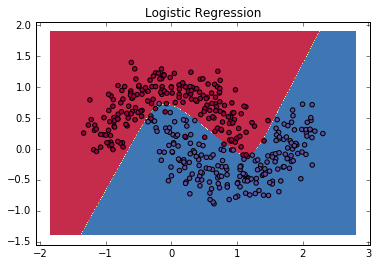

In [15]:
# Create test data
(X, y) = create_dataset()

# Build a model with a 3-dimensional hidden layer
model = build_model(X, y, 3, print_loss=True)

# Plot the decision boundary
plot(X, y, model)